In [ ]:
!pip install pandas matplotlib numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

C:\Users\rodri\AppData\Local\Temp\ipykernel_16116\1952898869.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
# Ruta utilizada para exportar los datos de Memristor-Discovery
data_path = "C:\\Users\\rodri\\Documents\\development\\memres\\sdc_knowm_alpha_stable\\exported_data"

In [8]:
files_in_dir = [ data_path + "\\" + x for x in os.listdir(data_path) ]

In [9]:
print("Total de muestras: {}".format(len(files_in_dir)))

604

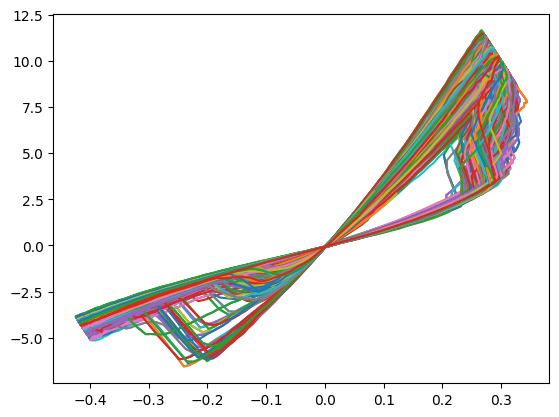

In [10]:
obtained_data = []
for file in files_in_dir:
    # Obtenemos los valores del archivo CSV
    df_memres = pd.read_csv(file, names=["voltage", "current"], skiprows=1)
    # Por cada uno de los archivos, se iran graficando sus valores para mostrar la curva de histeresis al final
    plt.plot(df_memres["voltage"], df_memres["current"])
    i_max = df_memres["current"].argmax(0) # Obtenemos el valor maximo de corriente (forward value)
    i_min = df_memres["current"].argmin(0) # Obtenemos el valor minimo de corriente (reverse value)
    max_values = df_memres.iloc[i_max] # Obtenemos voltaje,corriente en el index de forward value
    min_values = df_memres.iloc[i_min] # Obtenemos voltaje,corriente en el index de reverse value
    forward_thresh_v = max_values["voltage"]
    forward_thresh_i = max_values["current"]
    reverse_thresh_v = min_values["voltage"]
    reverse_thresh_i = min_values["current"]
    
    obtained_data.append({
        "forward_threshold_voltage": forward_thresh_v,
        "forward_threshold_current": forward_thresh_i,
        "forward_threshold_resistence": forward_thresh_v/(forward_thresh_i * 1), # Calculamos la posible resistencia en el punto
        "reverse_threshold_voltage": reverse_thresh_v,
        "reverse_threshold_current": reverse_thresh_i,
        "reverse_threshold_resistence": reverse_thresh_v/(reverse_thresh_i* 1)
    })
    

In [11]:
np.mean( [ x["forward_threshold_voltage"] for x in obtained_data ] )

0.29384681247915684

In [12]:
np.mean( [ x["reverse_threshold_voltage"] for x in obtained_data ] )

-0.3995606664801513

In [13]:
only_forward_voltages = []
only_reverse_voltages = []
for item in obtained_data:
    only_forward_voltages.append(item["forward_threshold_voltage"])
    only_reverse_voltages.append(item["reverse_threshold_voltage"])

In [14]:
with open("only_forward_voltages.csv", "w") as f:
    f.write( "\n".join([ str(x) for x in only_forward_voltages ]) )

In [15]:
with open("only_reverse_voltages.csv", "w") as f:
    f.write( "\n".join([ str(x) for x in only_reverse_voltages ]) )